In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


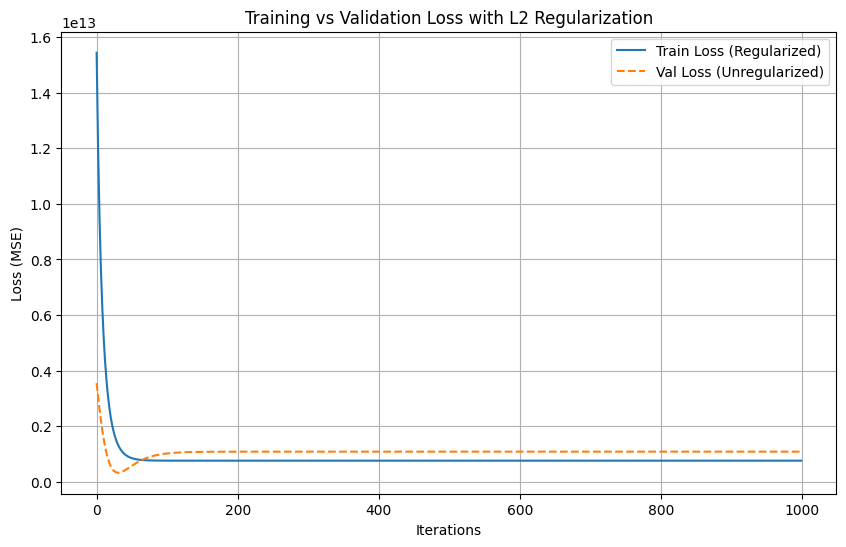

Final Training Loss (with penalty): 7.60e+11
Final Validation Loss: 1.08e+12


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/Courses/ML/Housing.csv"
data = pd.read_csv(file_path)

features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
target = "price"

X_raw = data[features].values
Y = data[target].values
m = len(Y)

def add_bias(X):
    return np.hstack((np.ones((X.shape[0], 1)), X))

def standardize(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

X_std = add_bias(standardize(X_raw))

train_size = int(0.8 * m)
X_train, X_val = X_std[:train_size], X_std[train_size:]
Y_train, Y_val = Y[:train_size], Y[train_size:]


# Regularized Gradient Descent

def compute_cost(X, Y, theta):
    m = len(Y)
    predictions = X.dot(theta)
    errors = predictions - Y
    return (1/(2*m)) * np.sum(errors**2)  # Evaluation loss

def gradient_descent_regularized(X, Y, X_val, Y_val, theta, lr=0.05, iterations=1000, lmbda=1.0):
    train_costs, val_costs = [], []

    for _ in range(iterations):
        m = len(Y)
        predictions = X.dot(theta)
        errors = predictions - Y

        # Gradient with regularization (do not regularize bias term)
        gradients = (1/m) * X.T.dot(errors)
        gradients[1:] += (lmbda/m) * theta[1:]  # regularize only theta[1:]

        theta -= lr * gradients

        # Record costs
        train_costs.append((1/(2*m)) * np.sum(errors**2) + (lmbda/(2*m)) * np.sum(theta[1:]**2))  # Training loss with penalty
        val_costs.append(compute_cost(X_val, Y_val, theta))  # Unregularized validation loss

    return theta, train_costs, val_costs

theta_init = np.zeros(X_train.shape[1])
theta_reg, train_reg, val_reg = gradient_descent_regularized(X_train, Y_train, X_val, Y_val, theta_init, lr=0.05, iterations=1000, lmbda=10.0)

# Plot Results

plt.figure(figsize=(10,6))
plt.plot(train_reg, label="Train Loss (Regularized)")
plt.plot(val_reg, '--', label="Val Loss (Unregularized)")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss with L2 Regularization")
plt.legend()
plt.grid(True)
plt.show()

# Final Costs

print(f"Final Training Loss (with penalty): {train_reg[-1]:.2e}")
print(f"Final Validation Loss: {val_reg[-1]:.2e}")


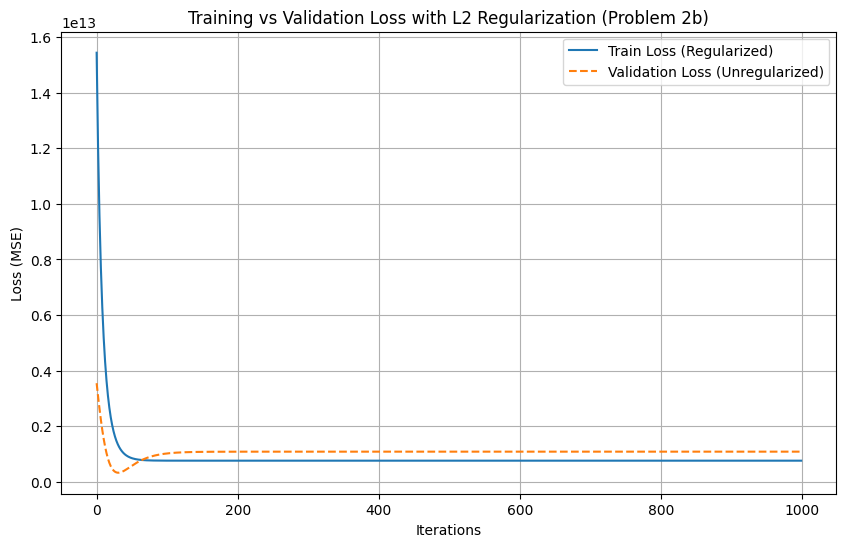

Final Training Loss (with penalty): 7.60e+11
Final Validation Loss: 1.08e+12


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/Courses/ML/Housing.csv"
data = pd.read_csv(file_path)

features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
target = "price"

X_raw = data[features].values
Y = data[target].values
m = len(Y)

def add_bias(X):
    return np.hstack((np.ones((X.shape[0], 1)), X))

def standardize(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

# Use best scaling approach from 2b (assume standardization)
X_scaled = add_bias(standardize(X_raw))

# Train/Validation split
train_size = int(0.8 * m)
X_train, X_val = X_scaled[:train_size], X_scaled[train_size:]
Y_train, Y_val = Y[:train_size], Y[train_size:]

# Regularized Gradient Descent

def compute_cost(X, Y, theta):
    """Unregularized cost (for evaluation)"""
    m = len(Y)
    predictions = X.dot(theta)
    errors = predictions - Y
    return (1 / (2*m)) * np.sum(errors**2)

def gradient_descent_regularized(X, Y, X_val, Y_val, theta, lr=0.05, iterations=1000, lmbda=1.0):
    """Gradient descent with L2 penalty (exclude bias)"""
    train_costs, val_costs = [], []

    for _ in range(iterations):
        m = len(Y)
        predictions = X.dot(theta)
        errors = predictions - Y

        # Gradient update with regularization (skip bias term)
        gradients = (1/m) * X.T.dot(errors)
        gradients[1:] += (lmbda/m) * theta[1:]

        theta -= lr * gradients

        # Training loss with penalty
        train_loss = (1/(2*m)) * np.sum(errors**2) + (lmbda/(2*m)) * np.sum(theta[1:]**2)
        train_costs.append(train_loss)

        # Validation loss (unregularized)
        val_costs.append(compute_cost(X_val, Y_val, theta))

    return theta, train_costs, val_costs

# Initialize theta
theta_init = np.zeros(X_train.shape[1])

# Train model with regularization
lambda_penalty = 10.0  # adjust as needed
theta_reg, train_reg, val_reg = gradient_descent_regularized(
    X_train, Y_train, X_val, Y_val, theta_init, lr=0.05, iterations=1000, lmbda=lambda_penalty
)

# Plot Training and Validation Losses

plt.figure(figsize=(10,6))
plt.plot(train_reg, label="Train Loss (Regularized)")
plt.plot(val_reg, '--', label="Validation Loss (Unregularized)")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss with L2 Regularization (Problem 2b)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Final Training Loss (with penalty): {train_reg[-1]:.2e}")
print(f"Final Validation Loss: {val_reg[-1]:.2e}")
